In [1]:
import torch

# 固定随机种子，使得运行结果可以稳定复现
torch.manual_seed(1024)
# 产生训练用的数据
x_origin = torch.linspace(100, 300, 200)
# 将变量X归一化，否则梯度下降法很容易不稳定
x = (x_origin - torch.mean(x_origin)) / torch.std(x_origin)
epsilon = torch.randn(x.shape)
y = 10 * x + 5 + epsilon

In [2]:
# 为了使用PyTorch的高层封装函数，我们通过继承Module类来定义函数
class Linear(torch.nn.Module):
    def __init__(self):
        """
        定义线性回归模型的参数：a, b
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.zeros(()))
        self.b = torch.nn.Parameter(torch.zeros(()))

    def forward(self, x):
        """
        根据当前的参数估计值，得到模型的预测结果
        参数
        ----
        x ：torch.tensor，变量x
        返回
        ----
        y_pred ：torch.tensor，模型预测值
        """
        return self.a * x + self.b

    def string(self):
        """
        输出当前模型的结果
        """
        return f'y = {self.a.item():.2f} * x + {self.b.item():.2f}'

In [3]:
# 定义每批次用到的数据量
batch_size = 20
# 定义模型
model = Linear()
# 确定最优化算法
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    # 选取当前批次的数据，用于训练模型
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    yy_pred = model(xx)
    # 计算当前批次数据的损失
    loss = (yy - yy_pred).pow(2).mean()
    # 将上一次的梯度清零
    optimizer.zero_grad()
    # 计算损失函数的梯度
    loss.backward()
    # 迭代更新模型参数的估计值
    optimizer.step()
    # 注意！loss记录的是模型在当前批次数据上的损失，该数值的波动较大
    print(f'Step {t + 1}, Loss: {loss: .2f}; Result: {model.string()}')

Step 1, Loss:  101.19; Result: y = 3.12 * x + -1.99
Step 2, Loss:  3.61; Result: y = 3.48 * x + -2.28
Step 3, Loss:  4.00; Result: y = 3.22 * x + -1.97
Step 4, Loss:  14.92; Result: y = 2.85 * x + -1.22
Step 5, Loss:  25.90; Result: y = 2.68 * x + -0.23
Step 6, Loss:  44.56; Result: y = 2.92 * x + 1.08
Step 7, Loss:  60.46; Result: y = 3.74 * x + 2.61
Step 8, Loss:  60.59; Result: y = 5.07 * x + 4.15
Step 9, Loss:  47.31; Result: y = 6.73 * x + 5.52
Step 10, Loss:  24.05; Result: y = 8.22 * x + 6.48
Step 11, Loss:  14.43; Result: y = 9.36 * x + 5.75
Step 12, Loss:  4.00; Result: y = 9.75 * x + 5.42
Step 13, Loss:  1.48; Result: y = 9.88 * x + 5.28
Step 14, Loss:  0.58; Result: y = 9.89 * x + 5.26
Step 15, Loss:  1.48; Result: y = 9.89 * x + 5.20
Step 16, Loss:  0.95; Result: y = 9.88 * x + 5.18
Step 17, Loss:  1.03; Result: y = 9.88 * x + 5.17
Step 18, Loss:  1.68; Result: y = 9.84 * x + 5.14
Step 19, Loss:  0.55; Result: y = 9.86 * x + 5.15
Step 20, Loss:  1.27; Result: y = 9.94 * x +

In [4]:
# 定义损失函数
mse = lambda y, y_pred: (y - y_pred).pow(2).mean()

In [5]:
# 定义每批次用到的数据量
batch_size = 20
# 定义模型
model = Linear()
# 确定最优化算法
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
stats = {'batch_loss': [], 'total_loss': []}

for t in range(20):
    # 选取当前批次的数据，用于训练模型
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    # 计算当前批次数据的损失
    loss = mse(yy, model(xx))
    # 将上一次的梯度清零
    optimizer.zero_grad()
    # 计算损失函数的梯度
    loss.backward()
    # 迭代更新模型参数的估计值
    optimizer.step()
    # 预估模型在整个数据集上面的损失
    stats['batch_loss'].append(loss.item())
    stats['total_loss'].append(mse(y, model(x)).item())

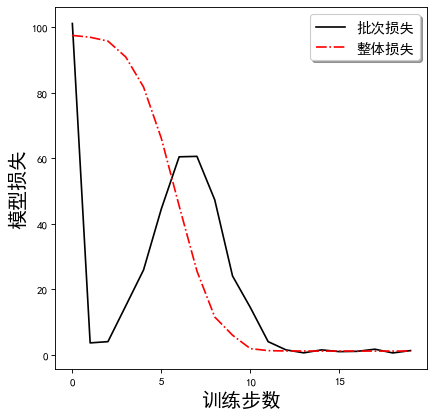

In [6]:
import matplotlib.pyplot as plt

# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=80)
# 在图形框里只画一幅图
ax = fig.add_subplot(111)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
ax.set_xlabel('训练步数', fontsize=18)
ax.set_ylabel('模型损失', fontsize=18)
ax.plot(stats['batch_loss'], 'k', label='批次损失')
ax.plot(stats['total_loss'], 'r-.', label='整体损失')
legend = plt.legend(shadow=True)
plt.savefig("sgd.png", dpi=800)
plt.show()